# Médias Móveis - Estudos Part15 Estudos Séries Temporais

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6

In [2]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month', date_parser=dateparse)

C:\estudos_coleta_dados\virtualenv\estudos_dados\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


In [3]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

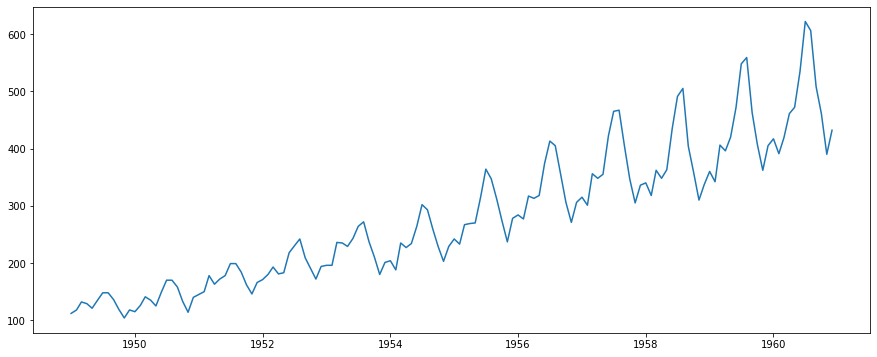

In [4]:
plt.plot(data)

In [6]:
# Criando um cod com objetivo de achar o periodo otimizado, achar quantas observações aplicadas aplicadas a media movel tornam 
# o modelo melhor 

# Criando os modelos de previsão de média movel

# Variavel de controle que vai armazenar o melhor periodo entre todos os testatos
optimal_n = None
# variavel armazenando a melhor metrica que vou encontrar
best_mse = None

# Cod de praparação
db = data[['#Passengers']].values.astype('float32') # values.astype convertendo para float32
mean_results_for_all_possible_n_values = np.zeros(int(len(db) / 2 - 2)) # criando um array de 0, convertendo para int, retornando a qant de elementos e fazendo uma operação mat

# Criando meus laços para buscar a melhor performance 
for n in range (3, int(len(db) / 2 + 1)):
    mean_for_n = np.zeros(len(db) - n)
    for i in range(0,len(db)-n):
        mean_for_n[i] = np.power(np.mean(db[:,0][i:i+n]) - db[i+n][0],2) # calculando a performance do modelo
    mean_results_for_all_possible_n_values[n -3] = np.mean(mean_for_n)

optimal_n = np.argmin(mean_results_for_all_possible_n_values) + 3
best_mse = np.min(mean_results_for_all_possible_n_values)

print('MSE = %s'% mean_results_for_all_possible_n_values)
print('Melhor MSE = %s'% best_mse)
print('Ótimo N = %s'% optimal_n)

MSE = [ 2339.63356126  2764.88660714  3012.10128709  3151.45469085
  3227.18632274  3256.56100643  3186.6614532   3011.60186946
  2743.00652782  2472.34091928  2354.71361401  2403.15665424
  2555.64628844  2755.90582275  2957.73325883  3148.95678109
  3318.74202065  3471.20655414  3579.85735927  3632.1383133
  3621.28446048  3590.00382793  3614.46072399  3714.23057056
  3856.30383806  4039.07639445  4228.22951927  4417.98332931
  4590.62775569  4759.11651611  4915.97544876  5048.63704665
  5147.82094512  5226.01903743  5334.33177783  5486.37155691
  5665.83581156  5879.92290769  6108.05805477  6311.94563847
  6507.04778972  6685.18398409  6897.90877682  7105.06745207
  7299.11089319  7470.66004841  7664.68188379  7894.86749032
  8104.34268864  8337.10501668  8595.05628641  8844.55092457
  9063.90415815  9272.33339998  9544.40100932  9837.04023888
 10135.60331142 10420.20548681 10725.07181564 11069.94461765
 11393.32528446 11748.71711731 12111.18046458 12433.46474122
 12664.11747454 129

In [8]:
# Fazendo a previsão prevendo 1 intervalo para frente 
print('MA = %s'% np.mean(db[:,0][len(db)-optimal_n:len(db)]))

MA = 427.66666


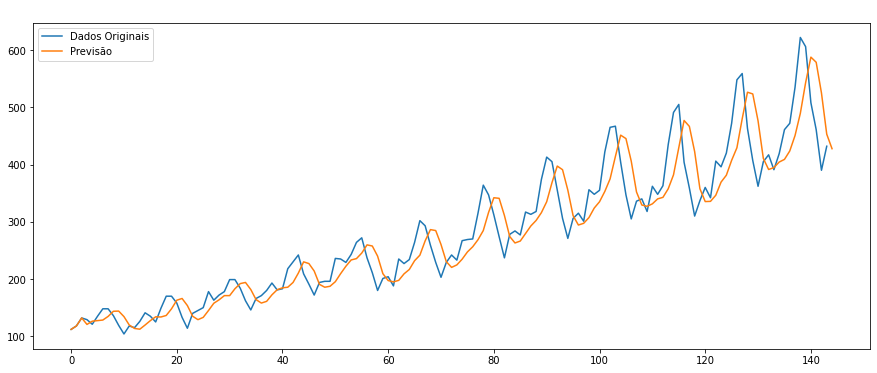

In [14]:
forecast = np.zeros(len(db) + 1)
for i in range(0, optimal_n):
    forecast[i] = db[i][0]
for i in range(0, len(db) - optimal_n + 1):
    forecast[i+optimal_n] = np.mean(db[:,0][i:i+optimal_n])

plt.plot(db[:,0], label='Dados Originais')
plt.plot(forecast, label='Previsão')
plt.title('Dados Originais X Previsão', color='white')
plt.legend()
plt.show()